<a href="https://colab.research.google.com/github/anisaAnya/coursework/blob/master/Refactored_22_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow.compat.v1 as tf

LENGTH_OF_DATA_QUERY = 5
INITIAL_LEARNING_RATE = 0.001
NUMBER_OF_NEURONS_IN_FIRST_LAYER = sum([i for i in range(LENGTH_OF_DATA_QUERY)])
NUMBER_OF_LAYERS = 7

WEIGHTS_NUMBER = 6
INPUT_NUMBER = 2


class NonLinearAdaline:
    def __init__(self, input_list=None, prev_weights=None):
        if input_list is None:
            self.input = tf.placeholder(tf.float32, INPUT_NUMBER)
            self.prev_weights = []
        else:
            self.input = input_list
            self.prev_weights = prev_weights
        self.extended_input = self.calc_extended_input(self)
        self.weights = tf.Variable(tf.truncated_normal([WEIGHTS_NUMBER], mean=0, stddev=1 / np.sqrt(WEIGHTS_NUMBER)),
                                   name='weights', trainable=True)
        self.weighted_input = tf.multiply(self.extended_input, self.weights)
        self.output = tf.reduce_sum(self.weighted_input)

    @staticmethod
    def calc_extended_input(self):
        return [
            self.input[0],
            self.input[0] * self.input[0],
            self.input[0] * self.input[1],
            self.input[1] * self.input[1],
            self.input[1],
            1
        ]


In [0]:
from math import sin, cos

class DataGenerator:
    def __init__(self, starting_point):
        self.lastpoint = 0
        self.secondlastpoint = 0
        self.starting_point = starting_point
        self.length_of_query = LENGTH_OF_DATA_QUERY
        self.points = self.calculate_data_points(self, starting_point, LENGTH_OF_DATA_QUERY)
        self.target_point = self.calculate_target_point(self, starting_point, LENGTH_OF_DATA_QUERY)
        self.a = 0
        self.b = 1

    @staticmethod
    def calculate_target_point(self, starting_point, length_of_query):
        return self.calculate_next_point(self, starting_point+length_of_query)

    @staticmethod
    def calculate_data_points(self, starting_point, length_of_query):
        return [self.calculate_next_point(self, i) for i in range(starting_point, starting_point + length_of_query)]
    
    @staticmethod
    def calculate_next_point(self, x):
        def f(self, x):
            res = sin(i) * cos(i) ** 3 + cos(i)
            self.secondlastpoint = self.lastpoint
            self.lastpoint = res
            return res
        def f1(self, x):
            res = (0.6*sin(x) + 0.3*sin(x*3) + 0.1*sin(5*x)) + 0.3*self.lastpoint + 0.6*self.secondlastpoint
            self.secondlastpoint = self.lastpoint
            self.lastpoint = res
            return res
        return f1(self, x)

    def get_first_point(self):
        if self.b == LENGTH_OF_DATA_QUERY:
            self.a += 1
            self.b = self.a + 1
        return self.points[self.a]

    def get_second_point(self):
        b = self.b
        self.b += 1
        return self.points[b]
        
    def get_data_points(self):
        return self.points

    def get_target_point(self):
        return self.target_point

    def shift_window(self):
        self.starting_point += 1
        self.target_point = self.calculate_target_point(self, self.starting_point, self.length_of_query)
        self.points = self.calculate_data_points(self, self.starting_point, self.length_of_query)
        self.a = 0
        self.b = 1

In [0]:
class NeuralNet:
    def __init__(self):
        self.input_layer = [NonLinearAdaline() for i in range(0, NUMBER_OF_NEURONS_IN_FIRST_LAYER)]
        self.target_point = tf.placeholder(tf.float32)
        self.learning_rate = tf.placeholder(tf.float32)
        self.layers = []
        self.current_layer = 0
        self.layers.append(self.input_layer)
        self.output_layer = self.input_layer
        self.create_training_tensors()

    def create_training_tensors(self):
        self.loss = [((neuron.output - self.target_point) ** 2) / 2 for neuron in self.output_layer]
        self.training_step = self.create_training_step()

    def create_training_step(self):
        training_steps = []
        for i in range(0, len(self.loss)):
            training_steps.append(tf.train.AdamOptimizer(self.learning_rate)
                                  .minimize(self.loss[i], var_list=self.output_layer[i].prev_weights.append(self.output_layer[i].weights)))
        return training_steps
    

In [0]:
from numpy import *
from matplotlib.pyplot import *


min_point = -0.6573386234540067
def normalize_data(point):
    normalized = (point - min_point) / (-min_point - min_point)
    return normalized 

def denormalize_data(point):
    restored = point*(-min_point - min_point) + min_point
    return restored    
    
target_sequence = []
predicted_sequence2 = []
def save_data_for_ploting(sess, feeds, network_instance):
    target_sequence.append(denormalize_data(feeds[network_instance.target_point]))
    res = sess.run([neuron.output for neuron in network_instance.output_layer], feeds)
    predicted_sequence2.append(denormalize_data(res[0]))


with tf.Graph().as_default():
    with tf.Session() as sess:
        data = DataGenerator(0)
        network_instance = NeuralNet()
        sess.run(tf.global_variables_initializer())
        a = 1
        while a <= 1:
            a += 1
            sum_loss = None
            for i in range(0, 6000):
                feeds = {}
                for neuron in network_instance.input_layer:
                    feeds[neuron.input] = [normalize_data(data.get_first_point()), normalize_data(data.get_second_point())]

                feeds[network_instance.learning_rate] = INITIAL_LEARNING_RATE
                feeds[network_instance.target_point] = normalize_data(data.get_target_point())
                _, loss = sess.run([network_instance.training_step, network_instance.loss], feeds)

                save_data_for_ploting(sess, feeds, network_instance)
                data.shift_window()

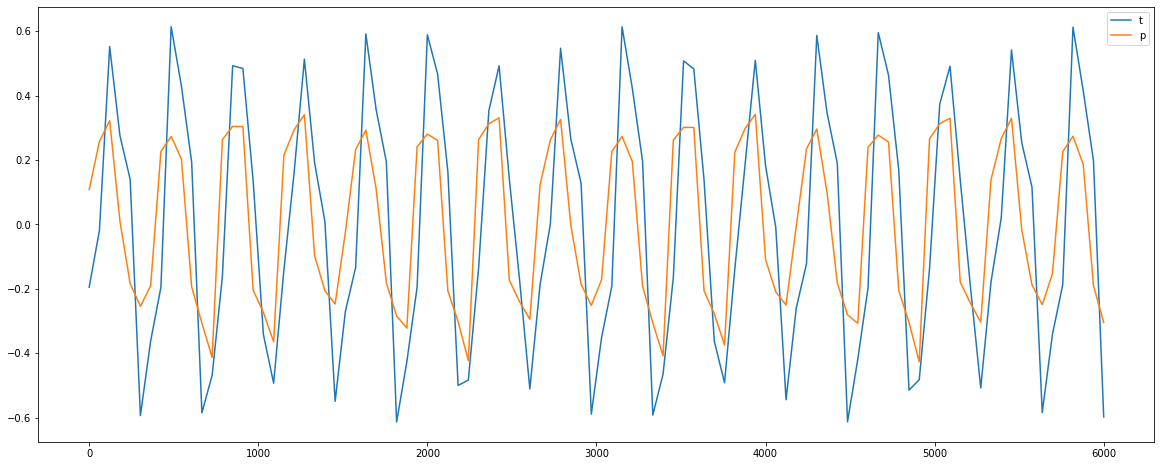

In [42]:
leng = len(predicted_sequence2)
window = 100
shift = 0

fig_size = rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
rcParams["figure.figsize"] = fig_size

t = linspace(0, leng, window)
plot(t, target_sequence[leng-window-shift:leng-shift])
plot(t, predicted_sequence2[leng-window-shift:leng-shift])
#print(target_sequence)
legend(['t', 'p'])
#savefig('tmp2.png')

In [21]:
a = []
b = [1,2,3]
print(b+a)

[1, 2, 3]
